# KNN for the Iris DataSet using SkiKit Learn

Use scikit-learn to apply k-means
clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data
set online. Explain in a Markdown cell how your code works and how accurate it
might be, and then explain how your model could be used to make predictions of
species of iris.

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Importing the Iris Dataset
https://www.kaggle.com/arshid/iris-flower-dataset?select=IRIS.csv

In [2]:
#loading in the dataset
iris = pd.read_csv('dataset/iris.csv')
#Show the first 10 rows in the dataset
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Visualization of Iris Data

In [3]:
#return the number of rows and colums
#display the info on the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Group the species together

In [4]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Dividing the data

In [5]:
#https://realpython.com/pandas-python-explore-dataset/
#set the feature to be the names of the columns 
features = list(iris.axes[1])
#remove the 'species' name
features.pop()
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
# Split the data into 2 arrays
# X : features
# Y : labels
X = iris[features].values
y = iris['species'].values

### Parallel Coordinates

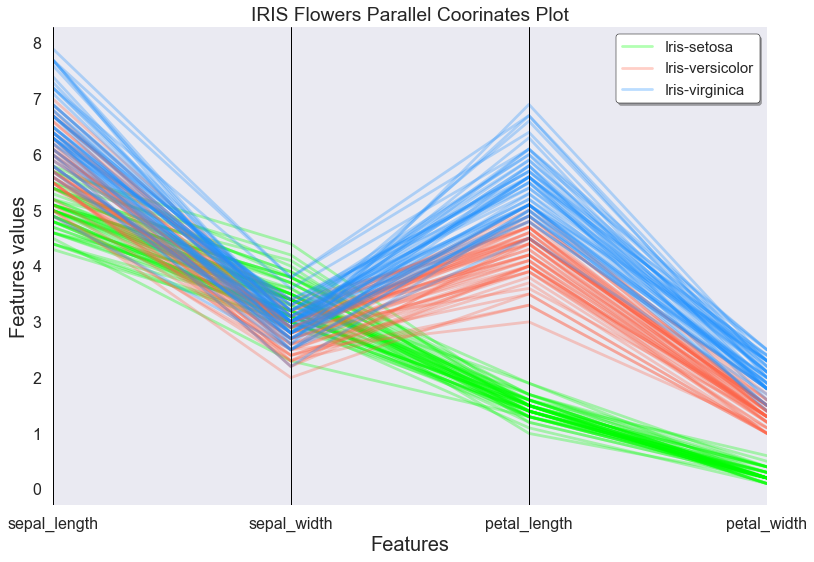

In [11]:
plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-poster')
#https://coderzcolumn.com/tutorials/data-science/how-to-plot-parallel-coordinates-plot-in-python-matplotlib-plotly
pd.plotting.parallel_coordinates(
    iris, "species", color=["lime", "tomato","dodgerblue"], alpha=0.3);

#Change Title, legends and X and Y labels
plt.title("IRIS Flowers Parallel Coorinates Plot")
plt.xlabel('Features', fontsize=20)
plt.ylabel('Features values', fontsize=20)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")

plt.show()

### Label encoding

[]https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Splitting into the Training and Test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)